# COGS 118A - Final Project

# Image Classification of ASL Hand Gestures

## Group members

- Rahul Ravi
- Rachel Doron
- Yohan Kim
- Brian Ripley
- Tianze Zhang

# Abstract 

Our goal is to accurately classify hand signs from American Sign Language (ASL) alphabet. We used the Sign Language MNIST dataset which consists of 784 total pixels per sample which represent a single 28x28 greyscaled pixel image of ASL hand gestures. The train set includes 27,455 cases and the testing set includes 7172 cases. We implemented an SVM model and tried different combinations of hyperparameters using GridSearchCV. We also used Convolutional Neural Networks (CNN) to classify the ASL hand gestures. We manipulated the number of layers and filters in our CNN to find an optimal model. This has potential application to help faciliate better communication between people who are deaf/hard of hearing and people who do not know ASL.

# Background

American Sign Language is expressed with hand signs. It is the primary language in the United States for people who are hard of hearing or deaf. In the United States, there are around 10 million people who are hard of hearing and around 1 million people who are functionally deaf<sup><a href="https://pubmed.ncbi.nlm.nih.gov/16177267/">[1]</a></sup>. Creating a machine learning algorithm that can recognize ASL hand signs can help these people. Some prior work that has occurred with American Sign Language recognition includes an implementation of an ASL translator on a web application based on a convolutional neural network classifier<sup><a href="http://cs231n.stanford.edu/reports/2016/pdfs/214_Report.pdf">[2]</a></sup>. Due to a lack of variation in their dataset they were unable to reproduce the validation accuracies they observed during training when they were testing. They hypothesize that with a more robust dataset, their models would be able to generalize more accurately. Creating a machine learning algorithm that can accurately recognize American Sign Language signs can allow people who use ASL to communicate with people who do not know sign language. This will lead them to be able to communicate with a wider range of people that they were not able to do so previously. 

[1]: https://pubmed.ncbi.nlm.nih.gov/16177267/
[2]: http://cs231n.stanford.edu/reports/2016/pdfs/214_Report.pdf

# Problem Statement

Given images of ASL hand signs, we want classify them with optimal accuracy. To achieve this we will be training our models on the 24 (excluding J and Z because they require motion) different characters of the ASL alphabet. We are going to use 27,455 of real world hand signs of the ASL alphabet in the form of images that we will generalize to a 28 by 28 pixel image. We want to then deploy models to learn on this data and predict the letter of a given hand sign.

In [4]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="images/american_sign_language.png", width=600, height=600)

# Data

We are going to be using Sign Language MNIST dataset, located at https://www.kaggle.com/datasets/datamunge/sign-language-mnist. This dataset comprises of 34000 oberservations of various hand signs of the ASL that look this:


In [5]:
Image(url="images/asl_color.png", width=600, height=600)

The data distributor has preprocessed the data, yielding in 784 gray-scaled pixels to analyze. Grayscale images may look like the following:

In [7]:
Image(url="images/asl_gray.png", width=600, height=600)

The dataset consists of 24 classes of letters (excluding J and Z which require motion). Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z). The training data includes 27,455 images and the test data includes 7172 images. 

First we checked if there are any corrupted values in our dataset. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('sign_mnist_train.csv')

In [4]:
data.isna().any().sum()

0

In [5]:
data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [6]:
column_val = 'pixel{value}'
for i in range(1, 785):
    if (data[column_val.format(value=i)] < 0).any() or (data[column_val.format(value=i)] > 255).any():
        print("Unexpected value encountered in pixel column {value}".format(value=i))

As we can see from these lines above, our dataset looks clean and we do not see any unexpected values from our dataset.

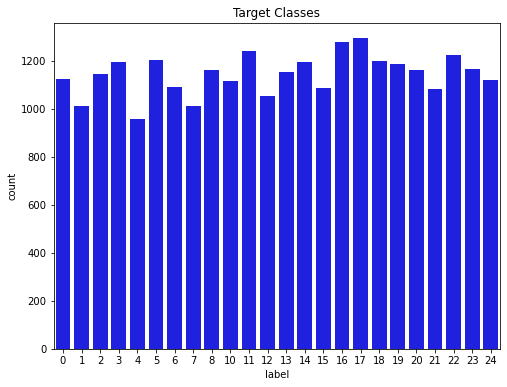

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(x = data['label'], color = 'b')
plt.title('Target Classes')
plt.show()

As seen above our classes are well balanced. 

# Proposed Solution

We will normalize the input data by dividing the pixel values by 255. 

We will be implementing Support Vector Machines (SVM) and Convolutional Neural Networks (CNN) to weigh the pros and cons of using such models for image classification. To begin, we will be using the scikit learn implementation of Support Vector Machine (SVM). Using sklearn GridSearch, we will optimize the parameters for these models. We will also build a Convolutional Neural Network (CNN) using PyTorch and TensorFLow. We will create multiple models and manipulate the number of layers and filters and will be comparing the accuracies along the way. 

SVM constructs a set of hyperplanes in a high dimensional space to separate the classes. Due to the complexity of image classification, we expect deep learning to result in the highest accuracy. We will experiment with the number of Conv2D and Dense layers and use Dropout for regualarization.

# Evaluation Metrics

For the evaluation metrics, we plan to use the multi-classes error measures. Instead of having positive/negative as our label values, we plan to have each sign alphabet (all 24 of them), then use suitable variables to calculate specificity and recall for each alphabet. Using this method, we will be able to achieve various insights such as how similar alphabet sign letters are affecting its accuracy/precision of the model, and how different model complexities affect our accuracy/precision of the model.

For CNN, we will be using accuracy as the evaluation metric. As shown above, we have a balanced classes so accuracy was a suitable metric. Had we more time, we would have also liked to consider F1 score to gauge both precision and recall.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Selecting Algorithms

We began by listing all suitable algorithms that were suitable for our classification problem. We narrowed this down to a list of four: K-nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree and Convolutional Neural Network (CNN). From this list, we decided to focus on only SVM and CNN. KNN may not be complex enough for our image classification problem and Decision Trees are prone to overfitting. SVM was deemed suitable as we would like to set decision boundaries that maximize the margins between the classes. CNNs are capable of learning complex patterns and work well for the complicated task of image classification

### CNN Baseline Model

We began working with CNN by creating a baseline model of Conv2D, MaxPooling and Dense layers. At this point, we were not paying too much attention to the makeup or number of layers. We simply wanted to gauge the accuracy of a simple neural network before proceeding to fine tune.

### CNN Overfitting

Our baseline model appeared to be slightly overfitting as it achieved 100% training accuracy. However, the testing accuracy was still fairly good at around 92-93%. In attempt of improving the testing accuracy, we researched methods to reduce overfitting and bring the training and testing accuracy closer together. Firstly, we attempted l2 regularization on the weights at various layers. Depending on the learning rate parameter used, the results varied. However, the addition of l2 regularization made training __much__ slower. Instead of the 10 epochs before, training now involved 100+ epochs, and the accuracy learning curves were still increasing when training was complete. We decided to attempt a more efficient strategy to treat the overfitting. Weight initialization was another idea. This resulted in overfitting once again. Finally, we attempted the addition of Dropout layers. This resulted in a reduction of overfitting and maximal testing accuracy of all our solutions. Dropout layers render a proportion of random neurons dead. We were able to increase testing accuracy to 94-95% while reducing training accuracy to 97-98%.

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



Learning Curve from best CNN by testing accuracy

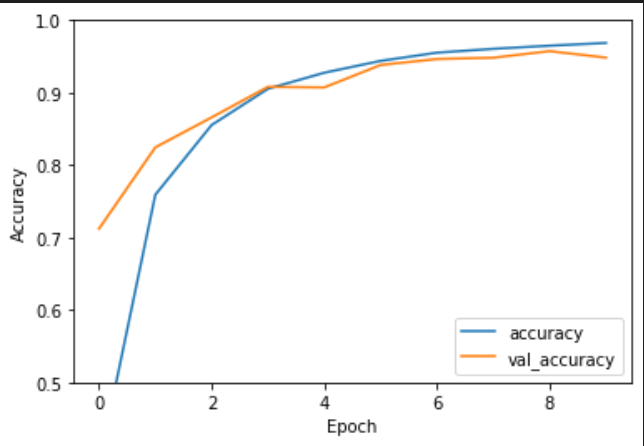

In [3]:
from IPython import display
display.Image('images/learning_curve.png')

## Results - SVM 

Our results and interpretation of results can be found in another notebook called "SVM Model.ipynb". To summarize, the main finding of the SVM model was that our dataset is too normalized in a sense that we can reduce the dimensionality of the dataset to less than 10% and it still outperforms the validation test. However, since data was too normalized, when it sees some ambiguous data, it tend to make mistakes.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

For our ethical review, we followed the guidelines from "Data Science Ethics Checklist" by deon ("https://deon.drivendata.org/"), which contains crucial information to consider such as how data is collected, how data is being stored, how to minimize the bias when making analysis. Our dataset is from Kaggle, which is open-source dataset webpage where all users can view/use for their commercial use. Though the author of this dataset does not mention who was recorded or how many people were being involved in this dataset, we can mitigate most of this privacy issue since the dataset only contains pictures of hands, with pixels of 28 x 28 per image. Our dataset link is in our notebook, to have transparency in our project.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="deafStats"></a>1.(#deafStats): Mitchell R. E. (2006). How many deaf people are there in the United States? Estimates from the Survey of Income and Program Participation. Journal of deaf studies and deaf education, 11(1), 112–119. https://pubmed.ncbi.nlm.nih.gov/16177267/<br>
<a name="ASLpaper"></a>2.(#ASL): Garcia, B., & Viesca, S. A. (2016). Real-time American sign language recognition with convolutional neural networks. Convolutional Neural Networks for Visual Recognition, 2, 225-232. http://cs231n.stanford.edu/reports/2016/pdfs/214_Report.pdf<br> 